### About Apriori Algorithm 

* Inventation 
> **Apriori is a seminal algorithm proposed by R. Agrawal and R. Srikant in 1994 for mining frequent itemsets for Boolean association rule**




* What is the Apriori Algorithm? 

**Apriori algorithm, a classic algorithm, is useful in mining frequent itemsets and relevant association rules. Usually, you operate this algorithm on a database containing a large number of transactions. One such example is the items customers buy at a supermarket.**

It helps the customers buy their items with ease, and enhances the sales performance of the departmental store.


* Apriori Algorithm – An Odd Name
>  **The name of the algorithm
is based on the fact that the algorithm uses prior knowledge of frequent itemset properties**



In [62]:
# import the needed libraries 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


!pip install squarify
import squarify
import seaborn as sns
import itertools
plt.style.use('fivethirtyeight')


# for market basket analysis
!pip install mlxtend --upgrade --no-deps
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [63]:
# reading the dataset

data = pd.read_csv('/content/Market_Basket_Optimisation.csv', header = None)


In [64]:
#shape of the data
data.shape

(7501, 20)

In [66]:
# head of the data (1st 5 values)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# tail of the data (lat 5 values)
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#description of data
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [69]:
# figuring out the no. of null values
data.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [70]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object

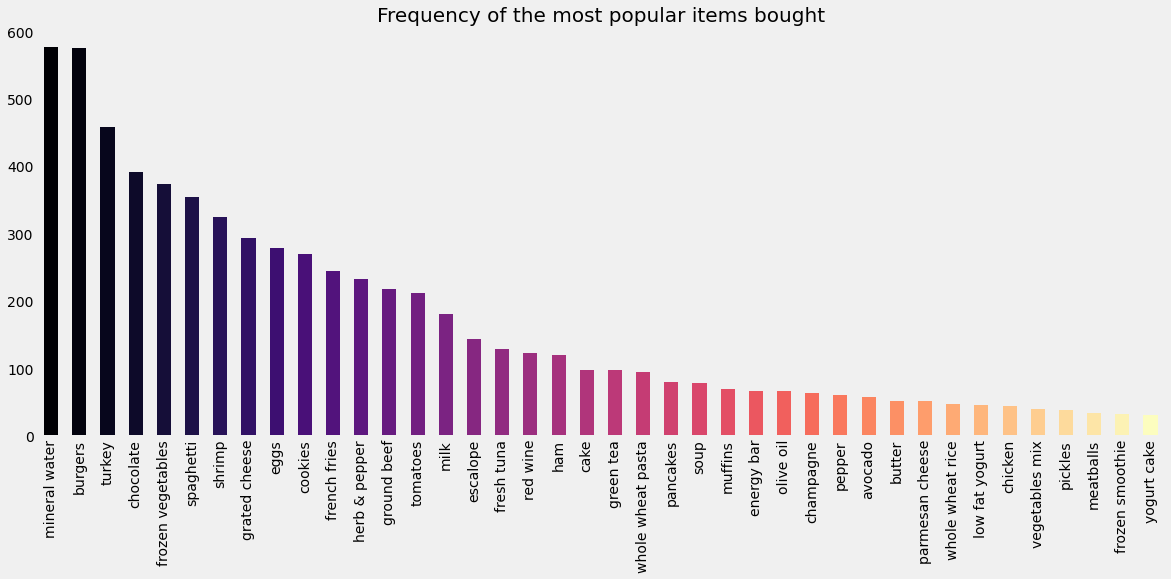

In [71]:
#  Frequency of the most popular items

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.magma(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('Frequency of the most popular items bought', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

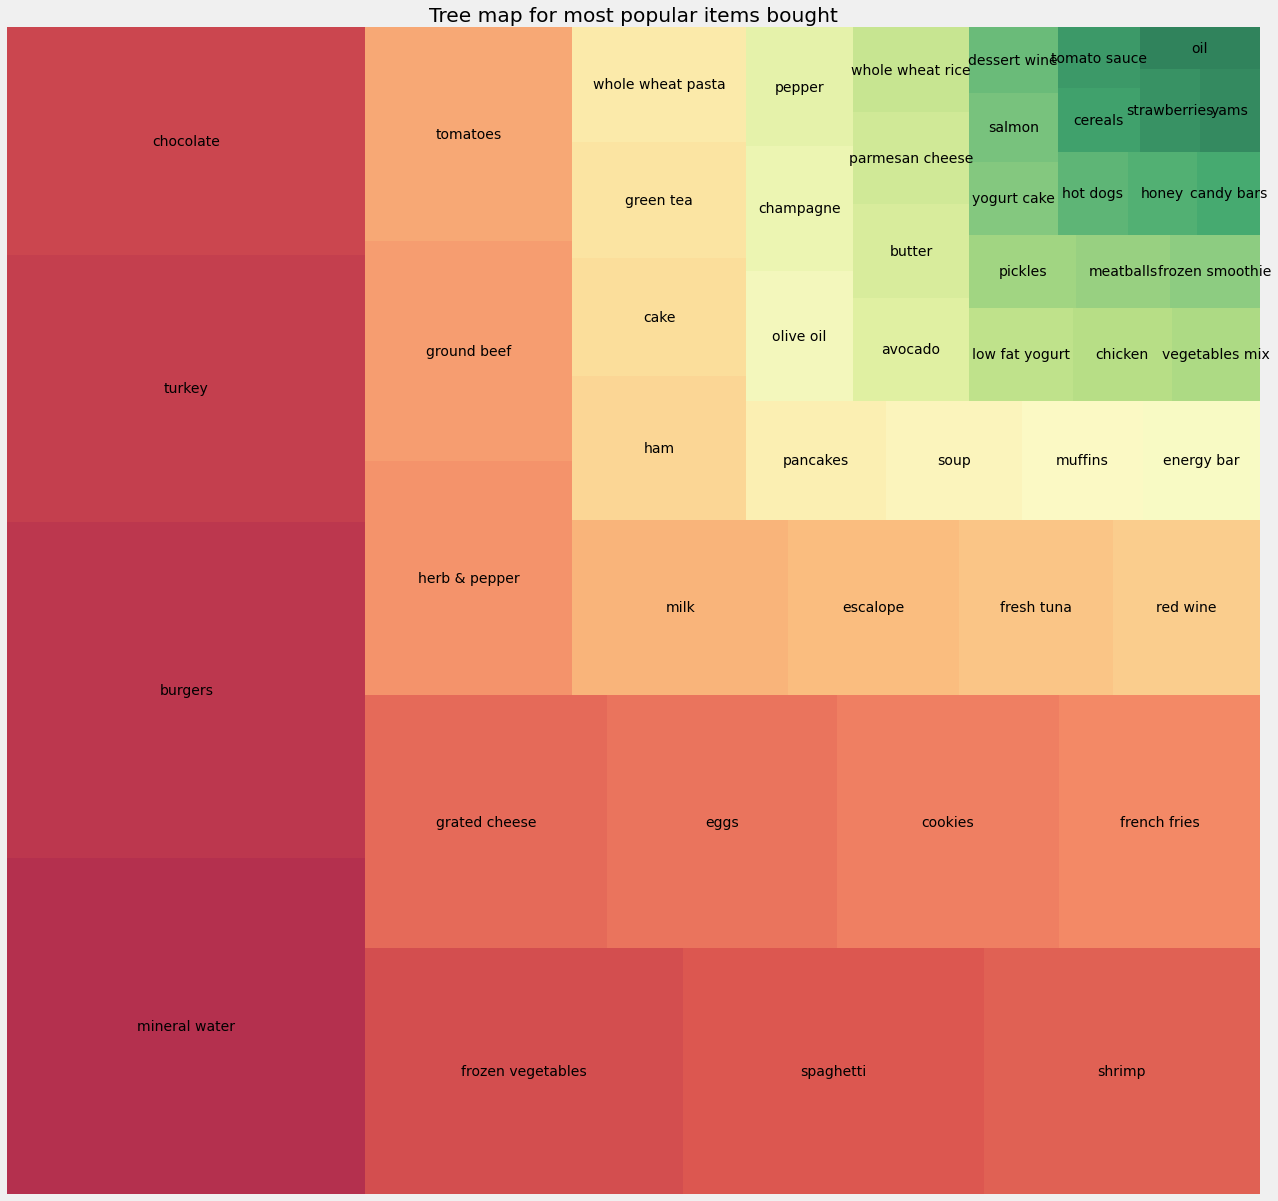

In [72]:
y = data[0].value_counts().head(50).to_frame()
y.index

# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.RdYlGn(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree map for most popular items bought')
plt.axis('off')
plt.show()

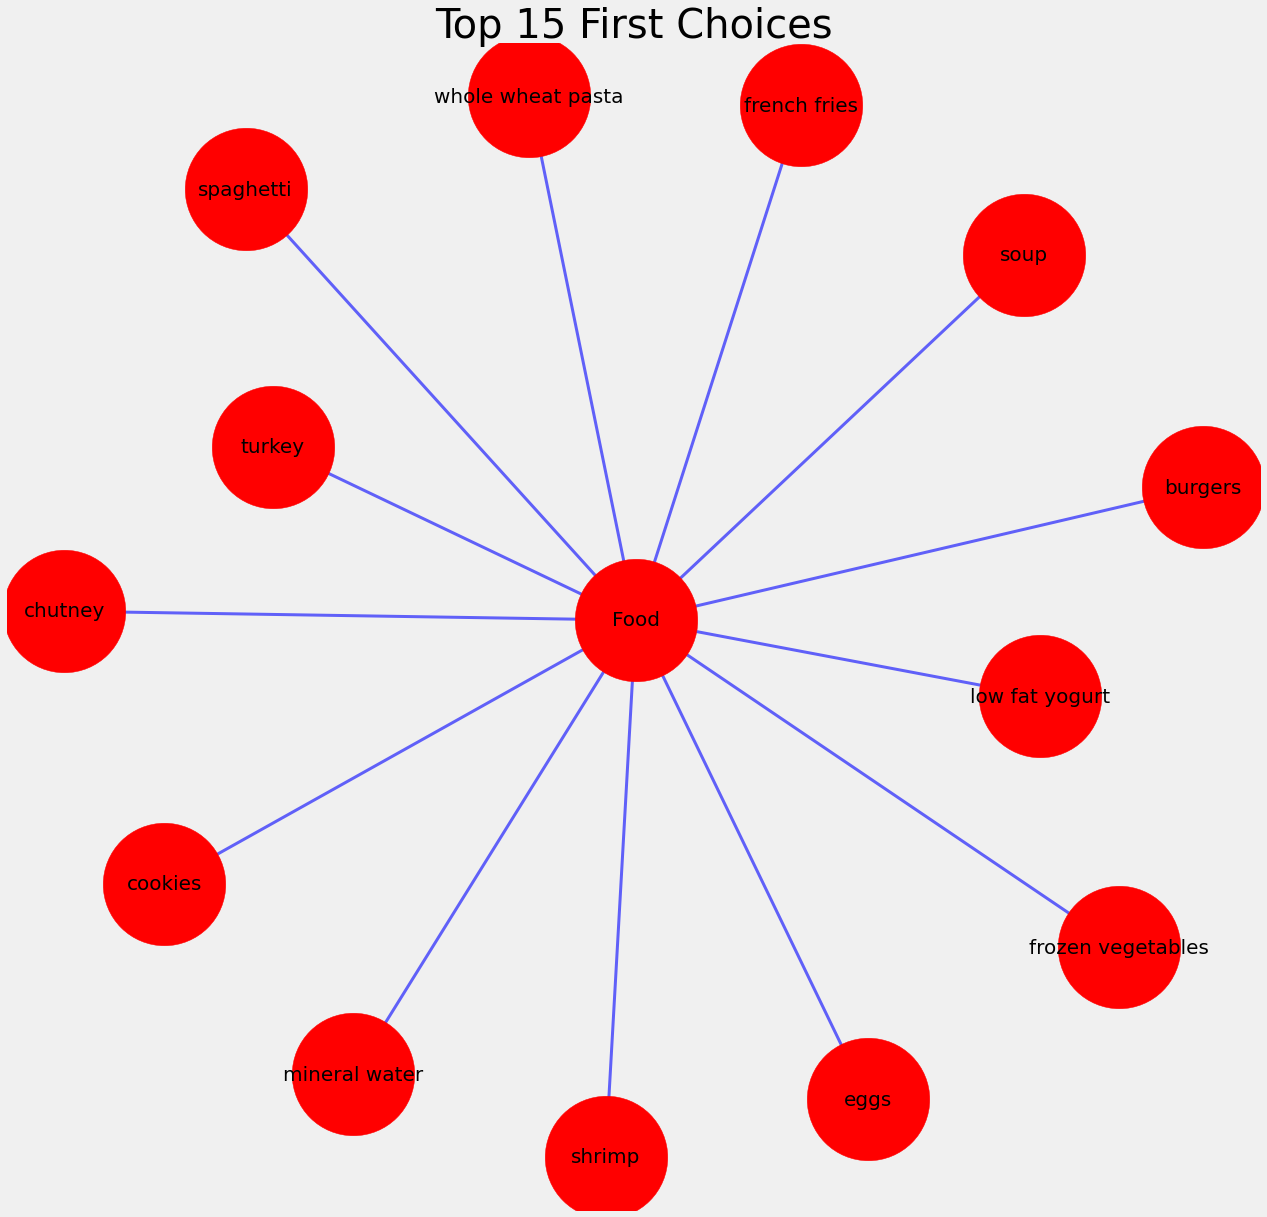

In [73]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)


plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.autumn(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'blue')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

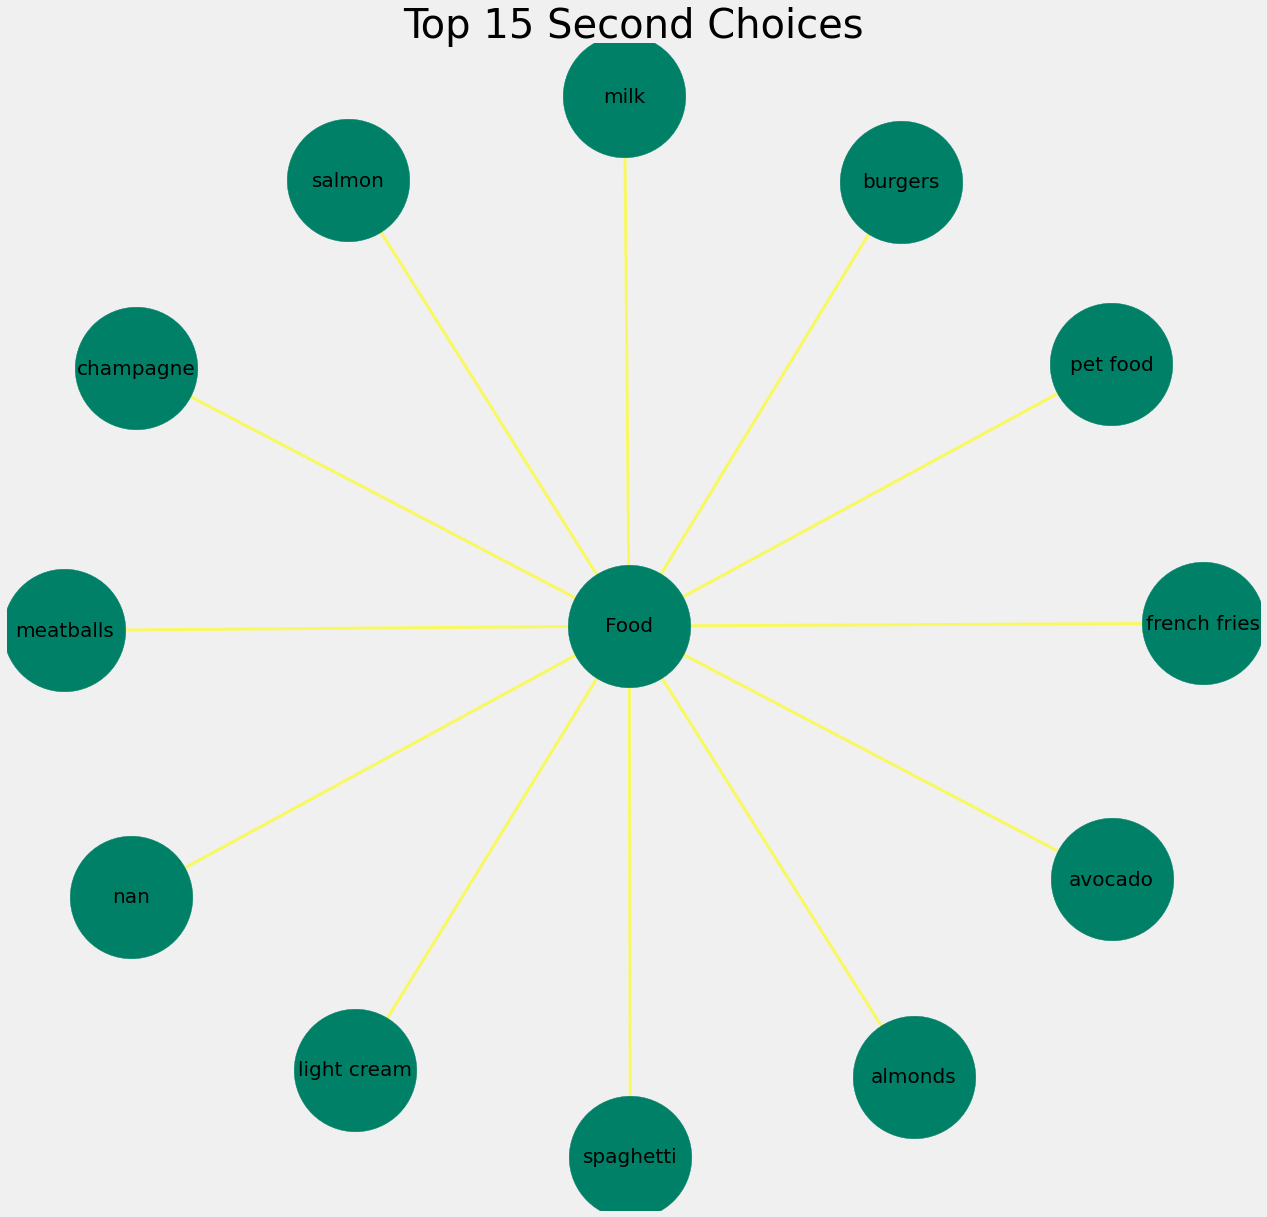

In [74]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)


plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.summer(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'Yellow')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

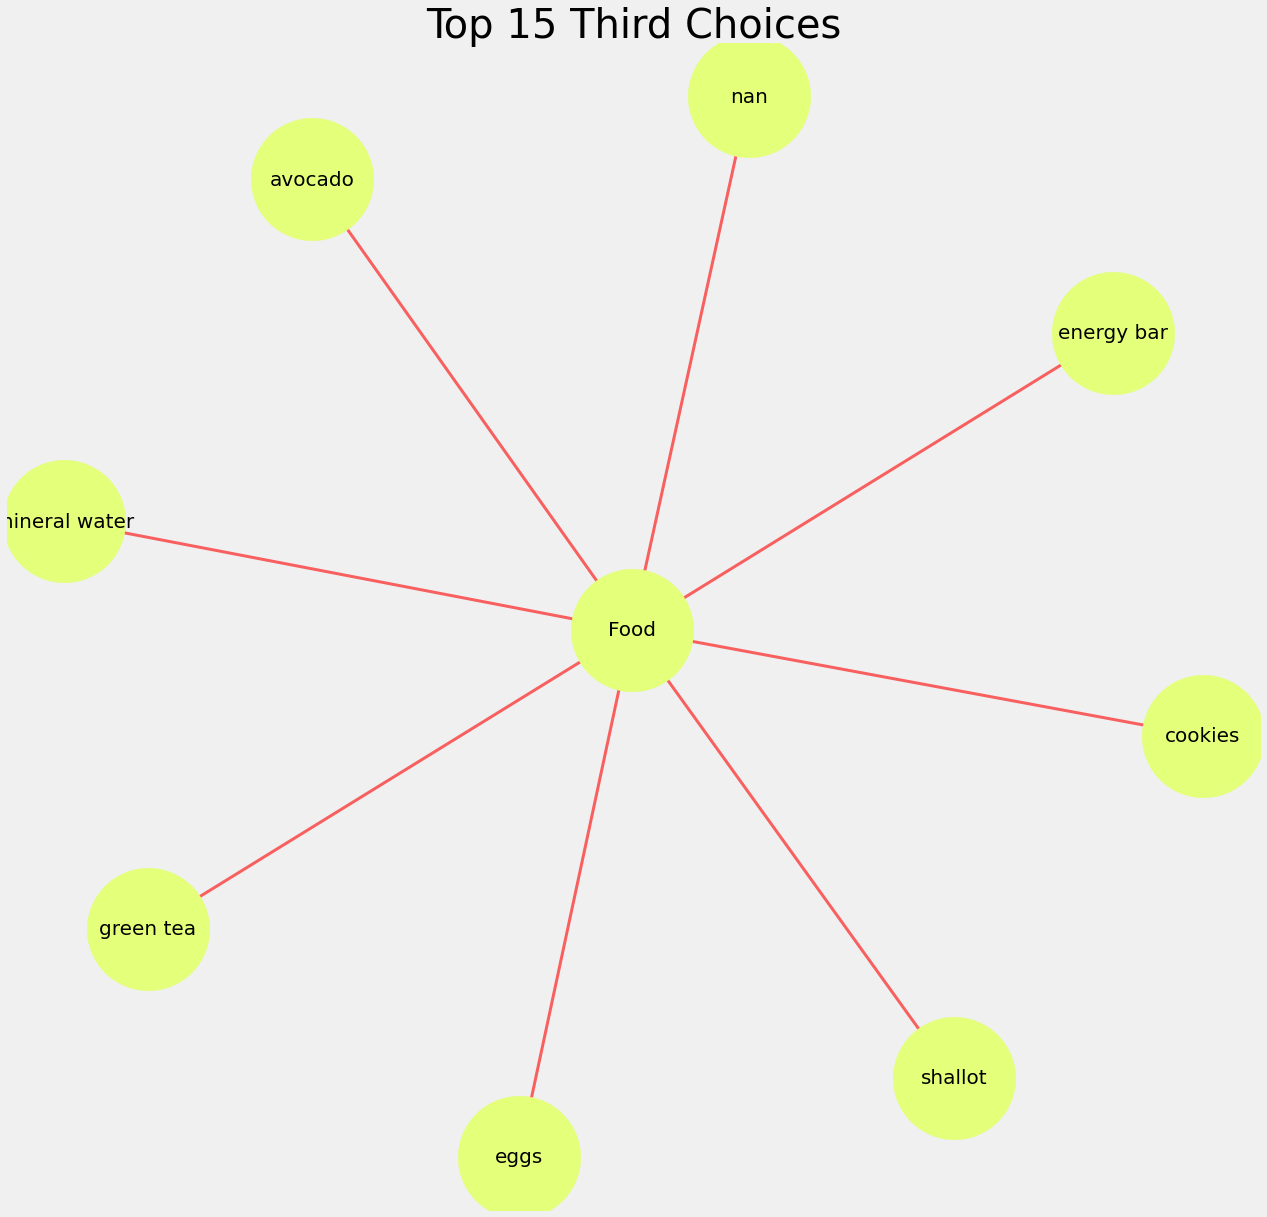

In [75]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'red')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Third Choices', fontsize = 40)
plt.show()

## Data Preprocessing 

In [76]:


# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])


trans = np.array(trans)

print(trans.shape)

(7501, 20)


### Using Transaction One hot Encoder 

In [77]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

data.shape

(7501, 121)

In [78]:


# getting correlations for 121 items would not be helpful
# so we reduce it from 121 to 40

data = data.loc[:, ['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables', 'spaghetti',
                    'shrimp', 'grated cheese', 'eggs', 'cookies', 'french fries', 'herb & pepper', 'ground beef',
                    'tomatoes', 'milk', 'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
                    'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar', 'olive oil', 'champagne', 
                    'avocado', 'pepper', 'butter', 'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 
                    'chicken', 'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie', 'yogurt cake']]

data.shape

(7501, 40)

In [79]:
# We return the items and itemsets with at least 5% support:
apriori(data, min_support = 0.05, use_colnames = True)

,support,itemsets
0,0.238368,(mineral water)
1,0.087188,(burgers)
2,0.062525,(turkey)
3,0.163845,(chocolate)
4,0.095321,(frozen vegetables)
5,0.174110,(spaghetti)
6,0.071457,(shrimp)
7,0.052393,(grated cheese)
8,0.179709,(eggs)
9,0.080389,(cookies)





## Selecting and Filtering the Results



In [80]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [81]:
# getting the item sets with length = 1 and support more than 5%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [82]:
# getting th item sets with length = 2 and support more than 5%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.05) ]

,support,itemsets,length
24,0.052660,"(chocolate, mineral water)",2
25,0.059725,"(mineral water, spaghetti)",2
26,0.050927,"(mineral water, eggs)",2


In [57]:

frequent_itemsets = apriori(data, min_support=0.05,use_colnames=True)
frequent_itemsets = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
frequent_itemsets[['antecedents','antecedent support','consequents','consequent support','confidence']]

,antecedents,antecedent support,consequents,consequent support,confidence
0,(chocolate),0.163845,(mineral water),0.238368,0.321400
1,(mineral water),0.238368,(chocolate),0.163845,0.220917
2,(mineral water),0.238368,(spaghetti),0.174110,0.250559
3,(spaghetti),0.174110,(mineral water),0.238368,0.343032
4,(mineral water),0.238368,(eggs),0.179709,0.213647
5,(eggs),0.179709,(mineral water),0.238368,0.283383


## Association Minning 

In [44]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'eggs', 'mineral water'} ]

,support,itemsets,length
26,0.050927,"(mineral water, eggs)",2


In [45]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'mineral water'} ]

,support,itemsets,length
0,0.238368,(mineral water),1


In [46]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chicken'} ]

,support,itemsets,length
22,0.059992,(chicken),1


In [47]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'frozen vegetables'} ]

,support,itemsets,length
4,0.095321,(frozen vegetables),1


In [48]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'chocolate'} ]

,support,itemsets,length
3,0.163845,(chocolate),1


## FP Growth Algorithm

> FP growth algorithm adopts a divide-conquer strategy as follows : 

It compresses the database representing frequent items into a
frequent pattern tree(FP-tree) which retains the itemset association information. 

It
then divides the compressed database into a set of conditional databases each associated with one frequent item or “pattern fragment,” and
mines each database separately. 

In [51]:
frequent_itemset_elements  = fpgrowth(data, min_support = 0.05 ,use_colnames = True)

In [52]:
frequent_itemset_elements

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [58]:
frequent_itemset_elements = fpgrowth(data, min_support=0.05,use_colnames=True)
frequent_itemset_elements = association_rules(frequent_itemset_elements, metric="confidence", min_threshold=0.1)
frequent_itemset_elements[['antecedents','antecedent support','consequents','consequent support','confidence']]

,antecedents,antecedent support,consequents,consequent support,confidence
0,(mineral water),0.238368,(eggs),0.179709,0.213647
1,(eggs),0.179709,(mineral water),0.238368,0.283383
2,(mineral water),0.238368,(spaghetti),0.174110,0.250559
3,(spaghetti),0.174110,(mineral water),0.238368,0.343032
4,(chocolate),0.163845,(mineral water),0.238368,0.321400
5,(mineral water),0.238368,(chocolate),0.163845,0.220917
